In [6]:
#Importing libraries

import pandas as pd
import json
import os

In [7]:
# !pip install pandas


In [8]:
# Loading the json data 
root_data_dir='/Users/HVMS/Desktop/GitHub/CineAI/data'

In [9]:
for sub_dir in sorted(os.listdir(root_data_dir)):
    print(sub_dir)  # Print each subdirectory in order



2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [10]:
for sub_dir in sorted(os.listdir(root_data_dir+ '/2000/')):
    print(sub_dir)

batch_001.json
batch_002.json
batch_003.json
batch_004.json
batch_005.json
batch_006.json
batch_007.json
batch_008.json


In [11]:
test_batch_1_2000 = root_data_dir+ '/2000/batch_001.json'
with open(test_batch_1_2000, 'r') as file_1:
    data_1 = json.load(file_1)

In [12]:
len(data_1)

1000

In [13]:
#To get movie ID
for movie_id in data_1:
    for keys,values in movie_id.items():
        print(keys)

98
8871
7443
9532
77
8358
22705
10867
4247
11688
10567
2123
2024
1359
1443
4234
3134
8843
5833
10501
1443
8358
10637
1900
10577
1636
9741
16366
107
2085
5994
5833
9600
2069
9679
11978
843
3536
20677
9383
9679
11978
9383
8584
1907
146
10559
10393
12107
3176
2085
1636
1493
10647
2655
59709
11518
10035
15999
19576
20677
10577
3536
16234
243
10481
10876
19457
71
10991
2155
9600
10783
36968
5551
2440
15653
49948
8452
641
2069
2067
5491
16
11075
9456
1597
134
889
4244
10571
55892
20770
8859
10461
12609
2332
10687
11973
21614
10571
5551
889
479
7290
20455
18079
8653
18041
14626
8452
49948
19419
1588
10641
105904
10471
24102
10873
193457
1588
30628
4958
101514
2787
31347
41245
447399
62182
392
10569
11366
12211
9871
105904
711
327
18011
10473
10862
8653
193457
16340
16187
117087
10385
8870
12480
10560
10597
18041
10429
11983
14805
10472
48246
13785
37588
60670
55888
10873
24102
1163
14181
919
10642
44321
44853
28031
11599
10562
21355
24100
41275
12650
24664
24476
10180
10480
30970
18079
19348


In [14]:
# To get movie individual keys columns such as(endpoints) - expecting 15 endpoints

first_movie = data_1[0]
movie_id = list(first_movie.keys())[0]
endpoints = first_movie[movie_id].keys()

print(f"Endpoints for movie ID {movie_id}:")
for endpoint in endpoints:
    print(f"- {endpoint}")

Endpoints for movie ID 98:
- details
- credits
- recommendations
- watch_providers


In [15]:
# Getting keys from 'details' endpoint for first movie
first_movie = data_1[0]  # Get first movie
movie_id = list(first_movie.keys())[0]  # Get movie ID
details_keys = first_movie[movie_id]['details'].keys()  # Get details keys

print(f"\nKeys in 'details' for movie {movie_id}:")
for key in sorted(details_keys):
    print(f"- {key}")


Keys in 'details' for movie 98:
- genres
- id
- original_language
- overview
- popularity
- release_date
- runtime
- title


In [16]:
# Getting the first movie and its ID
movie = data_1[0]
movie_id = list(movie.keys())[0]
movie_data = movie[movie_id]

# Print all endpoint keys
print(f"\nAll endpoint keys for movie ID {movie_id}:")
for endpoint in sorted(movie_data.keys()):
    print(f"\n{endpoint.upper()} keys:")
    try:
        keys = movie_data[endpoint].keys()
        for key in sorted(keys):
            print(f"- {key}")
    except AttributeError:
        print("(No nested keys)")


All endpoint keys for movie ID 98:

CREDITS keys:
- cast
- crew

DETAILS keys:
- genres
- id
- original_language
- overview
- popularity
- release_date
- runtime
- title

RECOMMENDATIONS keys:
- results

WATCH_PROVIDERS keys:
- results


In [17]:
movie = data_1[0]
movie_id = list(movie.keys())[0]
movie_data = movie[movie_id]

# Initializing counter
total_keys = 0

# To Count and print keys for each endpoint
print(f"\nKey counts for movie ID {movie_id}:")
for endpoint in sorted(movie_data.keys()):
    try:
        keys = movie_data[endpoint].keys()
        num_keys = len(keys)
        total_keys += num_keys
        print(f"{endpoint}: {num_keys} keys")
    except AttributeError:
        print(f"{endpoint}: No nested keys")

print(f"\nTotal number of keys across all endpoints: {total_keys}")


Key counts for movie ID 98:
credits: 2 keys
details: 8 keys
recommendations: 1 keys
watch_providers: 1 keys

Total number of keys across all endpoints: 12


In [18]:
movie = data_1[0]
movie_id = list(movie.keys())[0]
movie_data = movie[movie_id]

# Assuming the details are nested within another dictionary, for example under 'details'
details = movie_data.get('details', {})

# Extracting the required details from the nested dictionary
title = details.get('title', 'N/A')
runtime = details.get('runtime', 'N/A')
release_date = details.get('release_date', 'N/A')
genres = details.get('genres', 'N/A')
overview = details.get('overview', 'N/A')

# Printing the extracted details
print(f"Title: {title}")
print(f"Runtime: {runtime} minutes")
print(f"Release Date: {release_date}")
print(f"Genres: {genres}")
print(f"Overview: {overview}")

Title: Gladiator
Runtime: 155 minutes
Release Date: 2000-05-04
Genres: [{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 12, 'name': 'Adventure'}]
Overview: In the year 180, the death of Emperor Marcus Aurelius throws the Roman Empire into chaos. Maximus is one of the Roman army's most capable and trusted generals, as well as a key advisor to the emperor. As Marcus' devious son Commodus ascends to the throne, Maximus is sentenced to execution. He escapes but is captured by slave traders. Renamed "Spaniard" and forced to become a gladiator, Maximus must battle to the death against other men for the amusement of paying audiences.


In [19]:
# # Extracting movie details
# movie_id = list(data_1[0].keys())[0]
# movie_data = data_1[0][movie_id]

# details = movie_data.get('details', {})
# movie_dict = {
#     'Title': details.get('title', 'N/A'),
#     'Runtime': details.get('runtime', 'N/A'),
#     'Release Date': details.get('release_date', 'N/A'),
#     'Genres': ', '.join([genre['name'] for genre in details.get('genres', [])]),
#     'Overview': details.get('overview', 'N/A')
# }

# # # Creating DataFrame
# # df = pd.DataFrame([movie_dict])  # Convert dictionary to DataFrame
# # print(df)

In [20]:
# Remove .DS_Store file if it exists
ds_store_path = os.path.join(root_data_dir, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)
    print('.DS_Store file removed')
else:
    print('.DS_Store file not found')

.DS_Store file not found


### All the movies data into movie dataframe

In [21]:
def data_pipeline(root_dir):
    all_movie_details = []
    for year_dir in os.listdir(root_dir):
        year_path = os.path.join(root_dir, year_dir)
        if os.path.isdir(year_path):
            for json_file in sorted(os.listdir(year_path)):
                file_path = os.path.join(year_path, json_file)
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)

                    for movie in data:
                        movie_id = list(movie.keys())[0]
                        movie_data = movie[movie_id]
                        details = movie_data.get('details', {})

                        movie_details = {
                            'movie_id': movie_id,
                            'year': year_dir, # Add year
                            'Title': details.get('title', 'N/A'),
                            'Runtime': details.get('runtime', 'N/A'),
                            'Release Date': details.get('release_date', 'N/A'),
                            'Genres': ', '.join([genre['name'] for genre in details.get('genres', [])]),
                            'Overview': details.get('overview', 'N/A')
                        }
                        all_movie_details.append(movie_details)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON in {file_path}: {e}")
                except Exception as e: #catch all other exceptions
                  print(f"An unexpected error occurred: {e}")
    return pd.DataFrame(all_movie_details)

In [22]:
# Example usage
movie_df = data_pipeline(root_data_dir)

In [23]:
movie_df.tail(5)

,movie_id,year,Title,Runtime,Release Date,Genres,Overview
234847,533005,2004,Whispering Pines 3,8,2004-01-01,,"In her celebrated video art serial, Whispering..."
234848,531637,2004,Secrets of Pearl Harbor,44,2004-12-10,,Dennis Haysbert dives 160 feet beneath the wav...
234849,532486,2004,Los hijos del último jardín,0,2004-01-01,Thriller,
234850,530897,2004,Comme un poisson dans l'eau,18,2004-01-21,,"Daniel is in search of happiness, of human rel..."
234851,531628,2004,Quest for Columbus: In Search of the Santa Maria,44,2004-03-01,,Quest for Columbus: In Search of the Santa Mar...


In [24]:
movie_df.columns

Index(['movie_id', 'year', 'Title', 'Runtime', 'Release Date', 'Genres',
       'Overview'],
      dtype='object')

In [25]:
movie_df.shape

(234852, 7)

In [26]:
# df copy
movie_df_copy = movie_df.copy()

In [41]:
#copy of movie_df

movie_df_copy.shape

(234852, 7)

# Performing EDA Aanalysis

In [42]:
# Check for missing values in each column
movie_df_copy.isnull().sum()

movie_id        0
year            0
Title           0
Runtime         0
Release Date    0
Genres          0
Overview        0
dtype: int64

In [43]:
# Drop rows with missing values
movie_df_copy = movie_df.dropna()

In [44]:
movie_df_copy.columns

Index(['movie_id', 'year', 'Title', 'Runtime', 'Release Date', 'Genres',
       'Overview'],
      dtype='object')

In [45]:
# Basic statistics
print("Dataset Shape:", movie_df_copy.shape)
print("\nBasic Statistics:")
print(movie_df_copy.describe())


Dataset Shape: (234852, 7)

Basic Statistics:
       movie_id    year   Title  Runtime Release Date       Genres Overview
count    234852  234852  234852   234852       234852       234852   234852
unique   230587      24  207028      462         8768         7645   206276
top     1193094    2013    Home        0   2003-01-01  Documentary         
freq          3   10000      46    30538         2288        34654    23240


In [46]:
# Data quality checks
quality_check = {
    'nulls': movie_df_copy.isnull().sum(),
    'zeros': (movie_df_copy[['movie_id', 'year', 'Runtime']] == 0).sum(),
    'empty_strings': (movie_df_copy[['Title', 'Genres', 'Overview']] == '').sum(),
    'duplicate_rows': movie_df_copy.duplicated().sum(),
    'invalid_dates': pd.to_datetime(movie_df_copy['Release Date'], errors='coerce').isnull().sum()
}

In [47]:
print("Data Quality Report:")
for check, result in quality_check.items():
    print(f"\n{check.upper()}:")
    print(result)

Data Quality Report:

NULLS:
movie_id        0
year            0
Title           0
Runtime         0
Release Date    0
Genres          0
Overview        0
dtype: int64

ZEROS:
movie_id        0
year            0
Runtime     30538
dtype: int64

EMPTY_STRINGS:
Title           0
Genres      31251
Overview    23240
dtype: int64

DUPLICATE_ROWS:
4265

INVALID_DATES:
7


In [52]:
# !pip install matplotlib
# !pip install seaborn

/var/folders/qg/2qk8qwz14y14_d03ypk9m02h0000gq/T/ipykernel_49170/1131124225.py:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates_valid.value_counts().resample('Y').count().plot(ax=ax4)


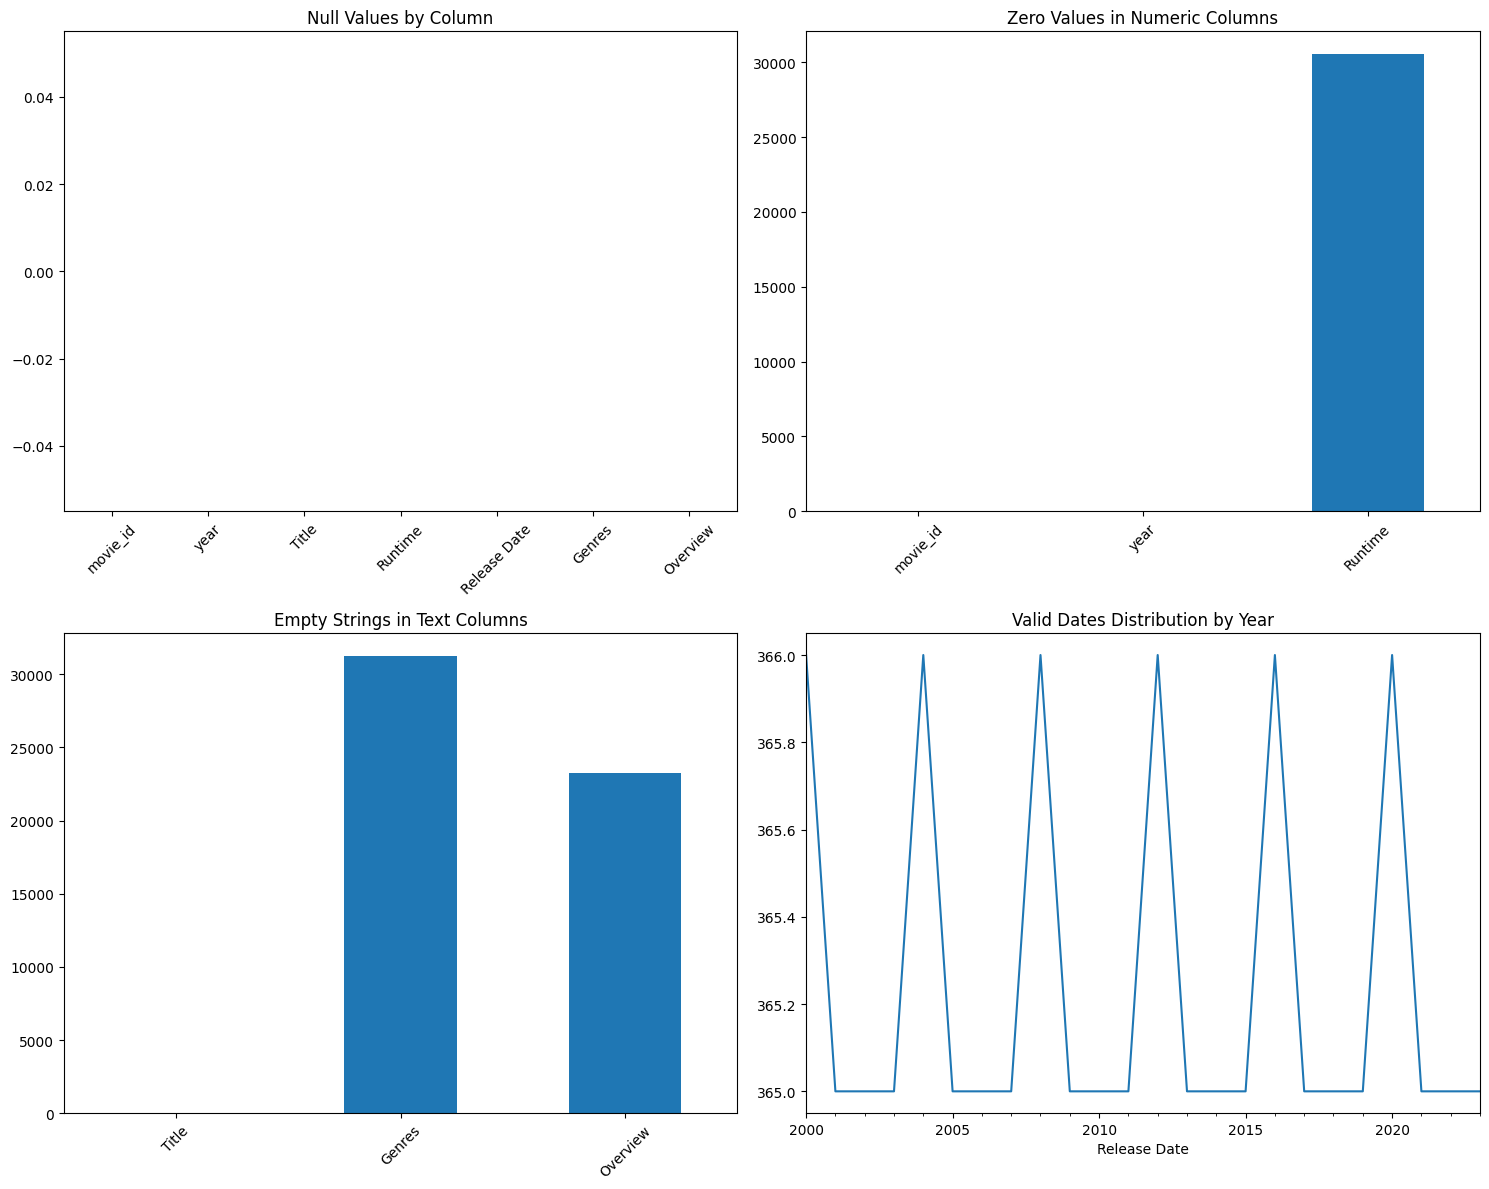


Data Quality Report Summary:
Total rows: 234852
Duplicate rows: 4265
Invalid dates: 7

Percentage of missing values by column:
movie_id        0.0
year            0.0
Title           0.0
Runtime         0.0
Release Date    0.0
Genres          0.0
Overview        0.0
dtype: float64


In [54]:
# Create a comprehensive data quality report with visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate quality metrics
quality_check = {
    'nulls': movie_df.isnull().sum(),
    'zeros': (movie_df[['movie_id', 'year', 'Runtime']] == 0).sum(),
    'empty_strings': (movie_df[['Title', 'Genres', 'Overview']] == '').sum(),
    'duplicate_rows': movie_df.duplicated().sum(),
    'invalid_dates': pd.to_datetime(movie_df['Release Date'], errors='coerce').isnull().sum()
}

# 2. Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Null values by column
quality_check['nulls'].plot(kind='bar', ax=ax1)
ax1.set_title('Null Values by Column')
ax1.tick_params(axis='x', rotation=45)

# Zero values in numeric columns
quality_check['zeros'].plot(kind='bar', ax=ax2)
ax2.set_title('Zero Values in Numeric Columns')
ax2.tick_params(axis='x', rotation=45)

# Empty strings in text columns
quality_check['empty_strings'].plot(kind='bar', ax=ax3)
ax3.set_title('Empty Strings in Text Columns')
ax3.tick_params(axis='x', rotation=45)

# Missing dates visualization
dates_valid = pd.to_datetime(movie_df['Release Date'], errors='coerce')
dates_valid.value_counts().resample('Y').count().plot(ax=ax4)
ax4.set_title('Valid Dates Distribution by Year')

plt.tight_layout()
plt.show()

# Print detailed report
print("\nData Quality Report Summary:")
print(f"Total rows: {len(movie_df)}")
print(f"Duplicate rows: {quality_check['duplicate_rows']}")
print(f"Invalid dates: {quality_check['invalid_dates']}")
print("\nPercentage of missing values by column:")
print((movie_df.isnull().sum() / len(movie_df) * 100).round(2))